---
# ┗(•̀へ •́ )ﾉ Hyun's Machine Learning (Regression)
---
자 Regression을 공부해봅시다 (´∇｀)  
## Authored by. Hyun
![미니언즈!](https://post-phinf.pstatic.net/MjAxNzA3MTBfMjIg/MDAxNDk5NjcxOTY1NDQw.Kz07JXiZg6AT6Y4PAZY7ubUNAr7rbDinLwFGuS0OOxcg.WVhpo8yfybUh0qImMGNAo1ucSUPuNOvQyzlO_vKlAlkg.JPEG/%EC%98%81%EC%A7%84%EC%9C%845.jpg?type=w1200)

# 목차

## 1. 차차 정리해봅시다

# 0-1. Regression

### Linear regression
- 선형회귀!
- 가장 basic!
- train data로 모델을 만들고, test data로 성능을 평가

### 빈용 메소드 모음
- **linear_model .LinearRegression ( fit_intercept = True , normalisze = True , copy_X = True , n_jobs = )**: 모델 만들어주기 
  - fit_intercept: 상수항을 넣을지 말지
  - normalize: 앞에서 scaling 해줬으면 굳이 또 안해줘도 됨
  - n_jobs: CPU를 몇 개 쓸건지 지정할 수 있다
 - **linear_model .LinearRegression . fit ( X_train , y_train )**: fit 시켜주기
   
   **.coef_**: 계수를 반환   

   **.intercept_**: y 절편을 반환
   
   **.predict ( X_test )**: : 예측하기
- **mean_squared_error ( y_true , y_pred )**: MSE 추출하기
- statsmodels를 이용해서 regression을 할 수도 있음

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [0]:
# statsmodels를 이용한 regression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

In [0]:
# Normal equation 예시1
from sklearn.linear_model import LinearRegression
lr_ne = LinearRegression(fit_intercept = True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

lr_ne.fit(X_train, y_train)

y_hat = lr_ne.predict(X_test)
y_true = y_test

mse = sklearn.metris.mean_squared_error(y_hat, y_true)

### Gradient descent
- 한 점에서 내려가면서 기존 값에서 계속 업데이트 해주면서 새로운 값을 적용해 최소값을 찾아내는 것

### 메소드 모음
- **linear_model .LinearRegressionGD ( eta0 = , epochs = , batch-size = , shuffle = )**: gradient descent 만들기
  - eta0: learning rate
- 예시)

  **linear_model .LinearRegressionGD ( eta0 = 0.001 , epochs = 10000 , batch-size = 1 , shuffle = False)**: Gradient descent
  
  **linear_model .LinearRegressionGD ( eta0 = 0.001 , epochs = 10000 , batch-size = len(X) , shuffle = False)**: Batch gradient descent
  
  **linear_model .LinearRegressionGD ( eta0 = 0.001 , epochs = 10000 , batch-size = 1 , shuffle = True)**: Stochasic gradient descent
  
  **linear_model .LinearRegressionGD ( eta0 = 0.001 , epochs = 10000 , batch-size = 100 , shuffle = True)**: Mini-batch stochasic gradient descent

### Stochastic gradient descent
- Gradient descent는 한 점을 잡고, 그 점에서 내려가서 최소값을 찾는 방법이다.
- 전체 데이터가 1억건, 10억건 되는 상황에서 전체를 고려해서 한 번씩 weight를 수정하는 것은 시간이 오래 걸림! 이러한 상황에서 1억건의 데이터를 1천만 건씩 나눠서 학습을 진행하자는 것이 Stochastic gradient descent.
- 기존보다 더 빠르게 학습함. 
- Stochastic gradient descent는 x의 값을 돌아가면서 gradient를 구해서 지역 최적화에 빠지는 것을 최소화 한다.

### 메소드모음
- **linear_model .SGDRegressor ( n_iter = , loss = ’squared_loss ’, penalty = ’l2 ’,  alpha = 0.0001 , l1_ratio = 0.15 , fit_intercept = True , max_iter = 1000 , tol = 0.001 , shuffle = True , verbose = 0 , epsilon = 0.1 , random_state = None , learning_rate = ’optimal ’ , eta0 = 0.01 , power_t = 0.25 , early_stopping = False , validation_fraction = 0.1 , n_iter_no_change = 5 , warm_start = False , average = False )**: Stochastic gradient descent
  - loss function: squared loss를 기본적으로 사용하면 된다.
  - penalty: regularization 방법. L1, L2, elastic net
  - alpha: L2 앞에 람다 값을 얼마로 설정해줄까. 이 값이 크면 클수록 regularization이 많이 되기 때문에 학습 데이터 값이 줄어든다.
  - max_iter: number of epoch. epoch을 몇 번 돌껀가
  - tol: 멈추는 기준
  - shutffle: SGD이기 때문에 섞는다. False로 하면 Batch gradient descent가 되는 것
  - learning_rate: 돌아갈 때마다 일정량 줄어들게 되는 것. 줄어드는 전략은 3개의 전략! constant, optimal, invscaling
  - eta0: learning rate을 지정. 학습속도를 빠르게 하려면 eta를 올려주면 됨. 
  - warm_start: 잘 안 쓰기는 하는데 weight의 초기값을 지정해줄 수 있다. 초기값을 기반으로 예측!

In [0]:
# Stochastic gradient descent 예시1
from sklearn.linear_model import SGDRegressor
lr_SGD = SGDRegressor()

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

from sklearn.mode_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

lr_SGD.fit(X_train, y_train)

y_hat = lr_SGD.predict(X_test)
y_true = y_test

mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))

'''
rmse값이 엄청나게 커졌다는 것은 학습이 잘 안 되었다는 뜻!
learning rate이 너무 크다거나 충분히 돌지 못했을 때 발생
'''

# scaled된 data로 돌리면
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state=42)

lr_SGD.fit(X_train, y_train)

y_hat = lr_SGD.predict(X_test)
y_true = y_test

mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
# rmse값이 안정적으로 나오게 된다. 즉 SGD regression을 할 때는 반드시 scaling을 해야 한다!

### Polynomial regression
- 1차식이 아닌 다항식! 비선형 관계 예측에 용이!

### 빈용 메소드 모음
- **PolynomialFeatures ( degree = )**: polynomial feature 만들어주기. degree가 2이면 제곱항까지 만들어줄 것을 의미
- **PolynomialFeatures .fit_transform ( 데이터 )**: polynomial feature로 바꿔주기

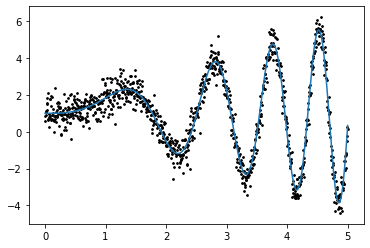

In [0]:
# 예시1 
import numpy as np
import matplotlib.pyplot as plt

def f(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1
    return (x,y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size)*0.5
    return (x,y)
  
  

f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s=3, c="black")
plt.show()

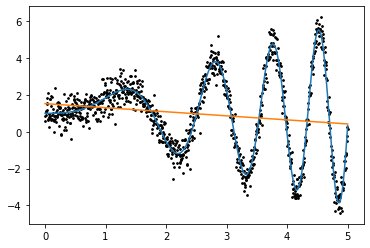

In [0]:
# 예시1 
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape, y.shape

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

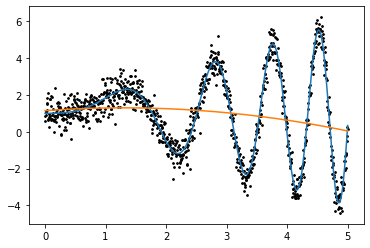

In [0]:
# 예시1 
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly,y)

f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

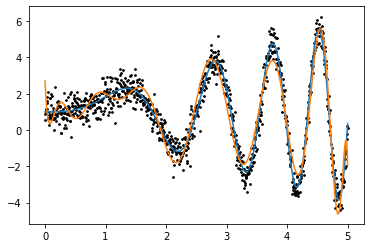

In [0]:
# 예시1 
poly_features = PolynomialFeatures(degree=16)
X_poly = poly_features.fit_transform(X)
X_poly[:3]

lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly,y)
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

### Regularized linear models (Lasso)
- Regularization에서 L1 방법을 쓰는 것
- Parameter에 절대값을 취함으로써 정규화시킨다.
- Lasso를 쓰면 feature selection이 가능하다.

### 메소드 모음
- **linear_model .Lasso ( alpha = 1.0, fit_intercept = True , normalize = False , precompute = False , copy_X = True , max_iter = 1000 , tol = 0.0001 , warm_start = False , positive = False , random_state = None , selection = ’cyclic ’)**: Lasso

In [0]:
# Lasso 예시
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

### Regularized linear models (Ridge)
- Regularization에서 L2 방법을 쓰는 것
- Parameter를 제곱함으로써 정규화시킨다.

### 메소드 모음
- **linear_model.Ridge ( alpha = 1.0 , fit_intercept = True , normalize = False , copy_X = True , max_iter = None , tol = 0.001 , solver = ’auto ’, random_state = None )**: Ridge
  - solver: auto로 하면 데이터를 보고서 fitting을 할 때 어떤 알고리즘을(normal equation, SGD) 알아서 찾아준다.

In [0]:
# Ridge 예시
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

### Logistic regression
- binary 형태로 예측을 하는 regression

### 빈용 메소드 모음
- **PolynomialFeatures ( degree = )**: polynomial feature 만들어주기. degree가 2이면 제곱항까지 만들어줄 것을 의미
- **PolynomialFeatures .fit_transform ( 데이터 )**: polynomial feature로 바꿔주기
- statsmodels을 이용할 수도 있음

In [0]:
# Logistic regression 에시
# 먼저 데이터를 반응변인과 예측변인으로 분리하기
Y = (df['Status'] == 'Developed').astype(np.int) #'Developed'면 1, 아니면 0으로
X = df.drop('Status', axis=1)

# 예측변인과 반응변인을 train set과 test set으로 분리해 줍니다.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.linear_model import LogisticRegression

# 1. 먼저 모델을 만들어 줍니다.
logReg = LogisticRegression()

# 2. 모델 적합시킵니다.
logReg.fit(X_train, y_train)

# 3. 트레이닝셋과 테스트셋에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
print('Training R^2:', logReg.score(X_train, y_train))
print('Test R^2: ', logReg.score(X_test, y_test))

# 모델로부터 반응을 예측하고 accuracy, f1-score, confusion matrix를 구해봅시다.
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
y_pred = logReg.predict(X_test)
print("Accuracy: %.2f" %accuracy_score(y_test, y_pred))
print("F1 score: %.2f" %f1_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

In [0]:
import statsmodels.api as sm
model = sm.Logit(y_train, X_train)
results = model.fit()
results.summary()

### Softmax function
- Logistic이 binary만 예측이 가능했다면 softmax는 여러 class를 예측할 수 있다.

In [0]:
# softmax regression 예시1
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

# predict
softmax_reg.predict([[5, 2]])

# predict probability
softmax_reg.predict_proba([[5, 2]])